# Evaluation

In this section the ML models that have been trained in the notebook "Training_ML_Models" will be evaluated with the help of a confusion matrix, f1 score, accurancy, precision, recall and a ROC curve.

## Imports

In [58]:
import importnb
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [59]:
with importnb.Notebook():
    from Data_Cleanup import df_filtered
    from Training_ML_Models import X_test, y_test, y_pred_knn, y_pred_knn_tuned, y_pred_rf, y_pred_rf_tuned, y_pred_dt, y_pred_dt_tuned, y_pred_gb, y_pred_gb_tuned, model_knn, model_knn_tuned, model_rf, model_rf_tuned, model_dt, model_dt_tuned, model_gb, model_gb_tuned

df_filtered.head()

,Marital status,Application mode,Application order,Daytime/evening attendance\t,Previous qualification,Mother's qualification,Admission grade,Displaced,Debtor,Tuition fees up to date,...,Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),GDP,Target
0,1,17,5,1,1,19,127.3,1,0,1,...,0,0,0,0.000000,0,0,0,0.000000,1.74,0
1,1,15,1,1,1,1,142.5,1,0,0,...,6,6,6,14.000000,6,6,6,13.666667,0.79,1
2,1,1,5,1,1,37,124.8,1,0,0,...,6,0,0,0.000000,6,0,0,0.000000,1.74,0
3,1,17,2,1,1,38,119.6,1,0,1,...,6,8,6,13.428571,6,10,5,12.400000,-3.12,1
4,2,39,1,0,1,37,141.5,0,0,1,...,6,9,5,12.333333,6,6,6,13.000000,0.79,1


## 1. kNN

### 1.1 Evaluation of Untuned Model

In [60]:
accuracy_model_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

print(f'Accuracy: {accuracy_model_knn}')
print('Confusion Matrix:')
print(conf_matrix_knn)
print('Classification Report:')
print(class_report_knn)

Accuracy: 0.8787878787878788
Confusion Matrix:
[[294  99]
 [ 33 663]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82       393
           1       0.87      0.95      0.91       696

    accuracy                           0.88      1089
   macro avg       0.88      0.85      0.86      1089
weighted avg       0.88      0.88      0.88      1089



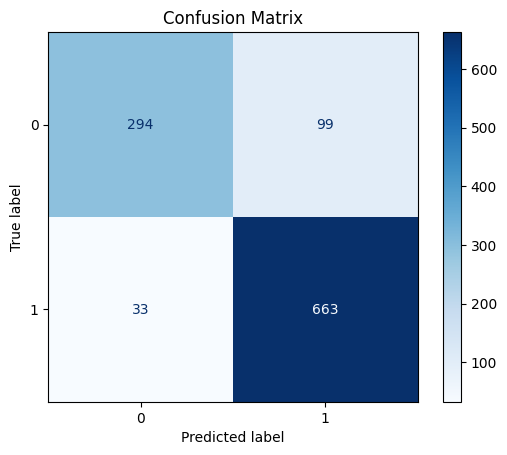

In [61]:
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_knn).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

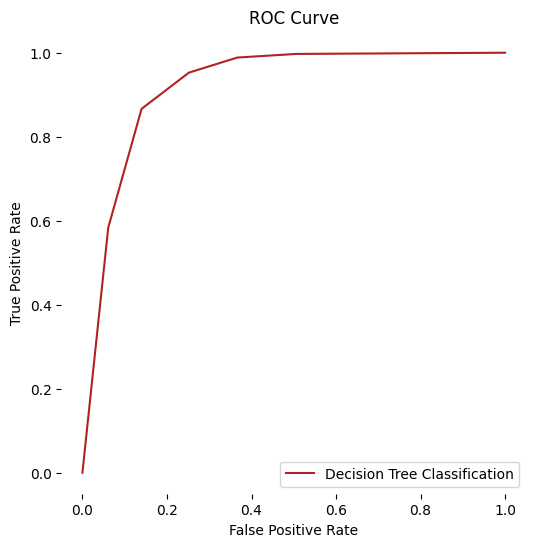

In [62]:
y_pred_probabiblity_knn = model_knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_probabiblity_knn)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='Decision Tree Classification', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend()

### 1.2 Evaluation of Tuned Model

In [63]:
accuracy_model_knn_tuned = accuracy_score(y_test, y_pred_knn_tuned)
conf_matrix_knn_tuned = confusion_matrix(y_test, y_pred_knn_tuned)
class_report_knn_tuned = classification_report(y_test, y_pred_knn_tuned)

print(f'Accuracy: {accuracy_model_knn_tuned}')
print('Confusion Matrix:')
print(conf_matrix_knn_tuned)
print('Classification Report:')
print(class_report_knn_tuned)

Accuracy: 0.8980716253443526
Confusion Matrix:
[[300  93]
 [ 18 678]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.76      0.84       393
           1       0.88      0.97      0.92       696

    accuracy                           0.90      1089
   macro avg       0.91      0.87      0.88      1089
weighted avg       0.90      0.90      0.90      1089



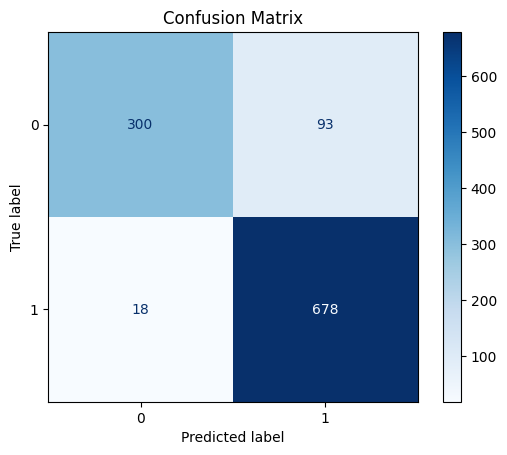

In [64]:
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_knn_tuned).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

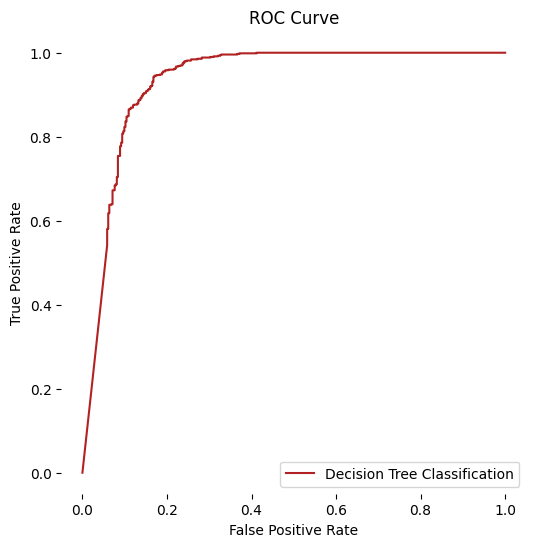

In [65]:
y_pred_probabiblity_knn_tuned = model_knn_tuned.predict_proba(X_test)[:,1]
fpr_tuned, tpr_tuned, thresholds_tuned = metrics.roc_curve(y_test,  y_pred_probabiblity_knn_tuned)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr_tuned, tpr_tuned, label='Decision Tree Classification', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend()

## 2. Random Forest

### 2.1 Evaluation of Untuned Model

In [66]:
accurancy_model_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f'Accuracy: {accurancy_model_rf}')
print('Confusion Matrix:')
print(conf_matrix_rf)
print('Classification Report:')
print(class_report_rf)

Accuracy: 0.9100091827364555
Confusion Matrix:
[[329  64]
 [ 34 662]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       393
           1       0.91      0.95      0.93       696

    accuracy                           0.91      1089
   macro avg       0.91      0.89      0.90      1089
weighted avg       0.91      0.91      0.91      1089



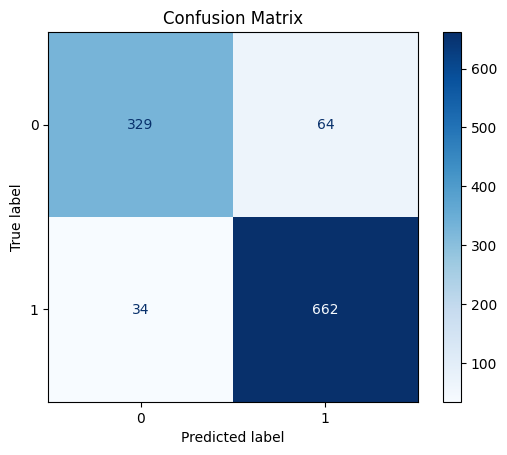

In [67]:
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

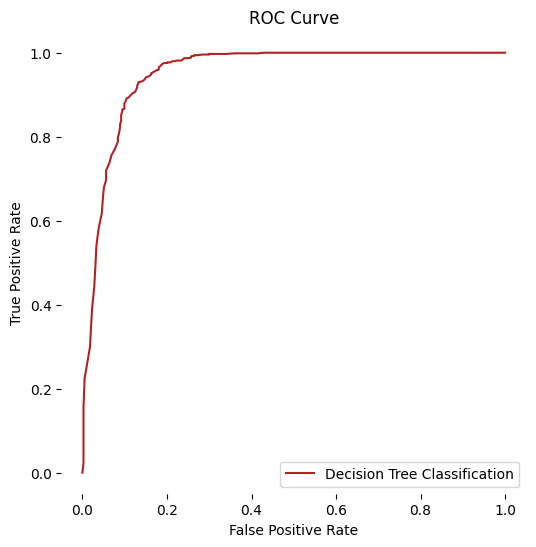

In [68]:
y_pred_probabiblity_rf = model_rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_probabiblity_rf)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='Decision Tree Classification', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend()

### 2.2 Evaluation of Tuned Model

In [69]:
accurancy_model_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
conf_matrix_rf_tuned = confusion_matrix(y_test, y_pred_rf_tuned)
class_report_rf_tuned = classification_report(y_test, y_pred_rf_tuned)

print(f'Accuracy: {accurancy_model_rf_tuned}')
print('Confusion Matrix:')
print(conf_matrix_rf_tuned)
print('Classification Report:')
print(class_report_rf_tuned)

Accuracy: 0.9146005509641874
Confusion Matrix:
[[324  69]
 [ 24 672]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       393
           1       0.91      0.97      0.94       696

    accuracy                           0.91      1089
   macro avg       0.92      0.89      0.90      1089
weighted avg       0.92      0.91      0.91      1089



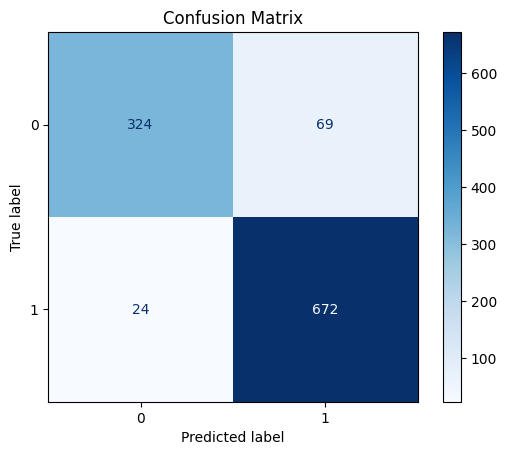

In [70]:
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf_tuned).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

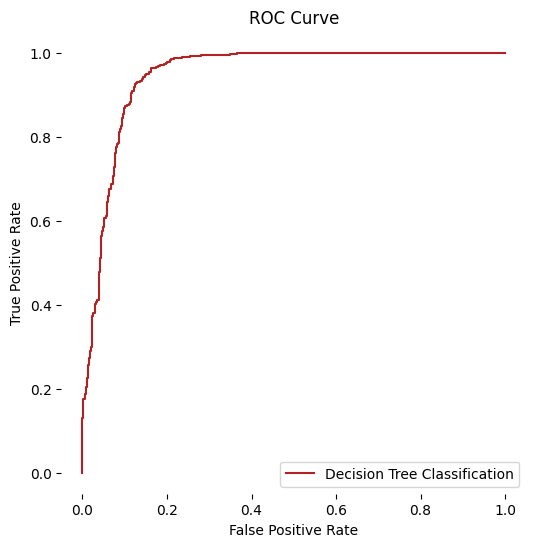

In [71]:
y_pred_probabiblity_rf_tuned = model_rf_tuned.predict_proba(X_test)[:,1]
fpr_tuned, tpr_tuned, thresholds_tuned = metrics.roc_curve(y_test,  y_pred_probabiblity_rf_tuned)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr_tuned, tpr_tuned, label='Decision Tree Classification', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend()

# 3. Decision Trees

### 3.1 Evaluation of Untuned Model

In [72]:
accuracy_model_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)

print(f'Accuracy: {accuracy_model_dt}')
print('Confusion Matrix:')
print(conf_matrix_dt)
print('Classification Report:')
print(class_report_dt)

Accuracy: 0.8429752066115702
Confusion Matrix:
[[318  75]
 [ 96 600]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       393
           1       0.89      0.86      0.88       696

    accuracy                           0.84      1089
   macro avg       0.83      0.84      0.83      1089
weighted avg       0.85      0.84      0.84      1089



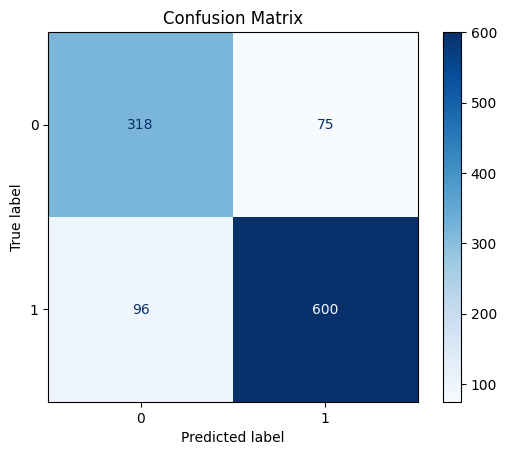

In [73]:
ConfusionMatrixDisplay(conf_matrix_dt, display_labels=model_dt.classes_).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

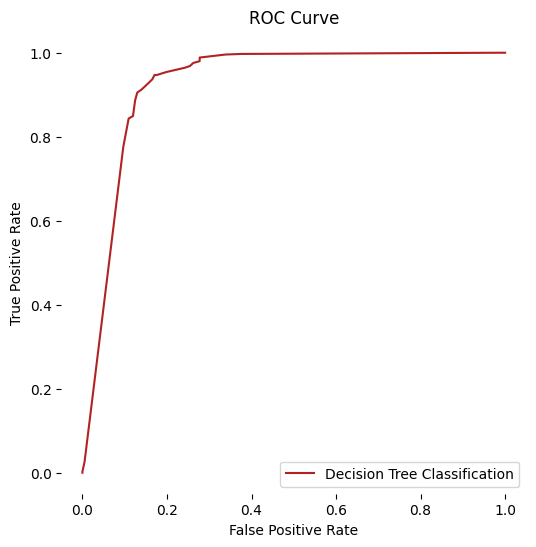

In [74]:
y_pred_probabiblity_dt = model_dt_tuned.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_probabiblity_dt)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='Decision Tree Classification', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend()

### 3.2 Evaluation of Tuned Model

In [75]:
accuracy_model_dt_tuned = accuracy_score(y_test, y_pred_dt_tuned)
conf_matrix_model_dt_tuned = confusion_matrix(y_test, y_pred_dt_tuned)
class_report_model_dt_tuned = classification_report(y_test, y_pred_dt_tuned)

print(f'Accuracy: {accuracy_model_dt_tuned}')
print('Confusion Matrix:')
print(conf_matrix_model_dt_tuned)
print('Classification Report:')
print(class_report_model_dt_tuned)

Accuracy: 0.9044995408631772
Confusion Matrix:
[[326  67]
 [ 37 659]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       393
           1       0.91      0.95      0.93       696

    accuracy                           0.90      1089
   macro avg       0.90      0.89      0.89      1089
weighted avg       0.90      0.90      0.90      1089



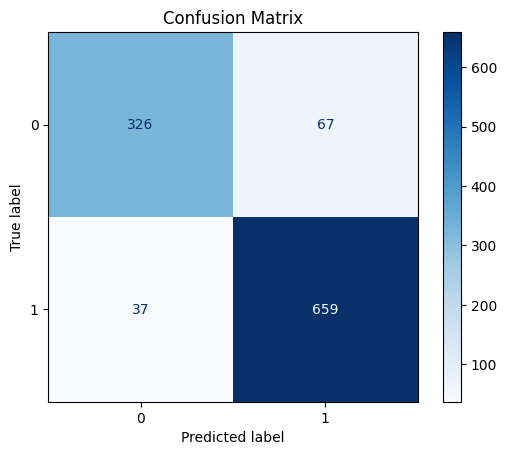

In [76]:
ConfusionMatrixDisplay(conf_matrix_model_dt_tuned, display_labels=model_dt.classes_).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

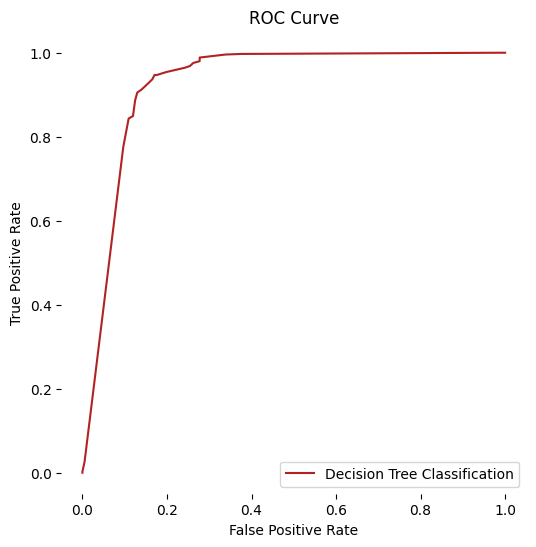

In [77]:
y_pred_probabiblity_dt_tuned = model_dt_tuned.predict_proba(X_test)[:,1]
fpr_tuned, tpr_tuned, thresholds = metrics.roc_curve(y_test,  y_pred_probabiblity_dt_tuned)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr_tuned, tpr_tuned, label='Decision Tree Classification', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend()

# 4. Naive Bayes

### 4.1 Evaluation of Untuned Model

In [78]:
accuracy_model_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_model_gb= confusion_matrix(y_test, y_pred_gb)
class_report_model_gb = classification_report(y_test, y_pred_gb)

print(f'Accuracy: {accuracy_model_gb}')
print('Confusion Matrix:')
print(conf_matrix_model_gb)
print('Classification Report:')
print(class_report_model_gb)

Accuracy: 0.8512396694214877
Confusion Matrix:
[[292 101]
 [ 61 635]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.74      0.78       393
           1       0.86      0.91      0.89       696

    accuracy                           0.85      1089
   macro avg       0.84      0.83      0.83      1089
weighted avg       0.85      0.85      0.85      1089



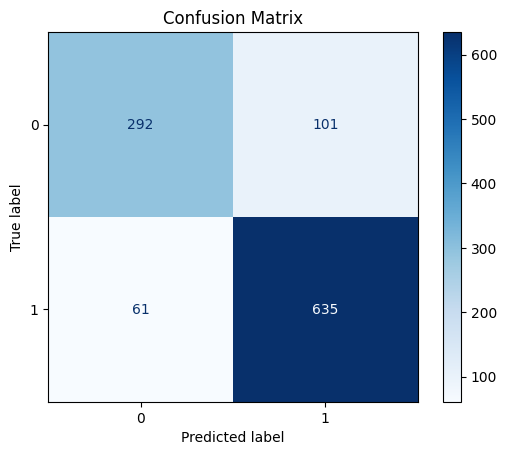

In [79]:
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_model_gb).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

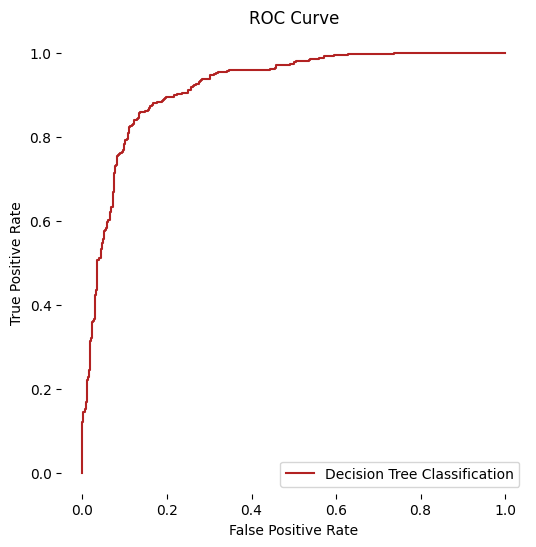

In [80]:
y_pred_probabiblity_gb = model_gb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_probabiblity_gb)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='Decision Tree Classification', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend()

### 4.2 Evaluation of Tuned Model

In [81]:
accuracy_model_gb_tuned = accuracy_score(y_test, y_pred_gb_tuned)
conf_matrix_model_gb_tuned = confusion_matrix(y_test, y_pred_gb_tuned)
class_report_model_gb_tuned = classification_report(y_test, y_pred_gb_tuned)

print(f'Accuracy: {accuracy_model_gb_tuned}')
print('Confusion Matrix:')
print(conf_matrix_model_gb_tuned)
print('Classification Report:')
print(class_report_model_gb_tuned)

Accuracy: 0.8512396694214877
Confusion Matrix:
[[276 117]
 [ 45 651]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.70      0.77       393
           1       0.85      0.94      0.89       696

    accuracy                           0.85      1089
   macro avg       0.85      0.82      0.83      1089
weighted avg       0.85      0.85      0.85      1089



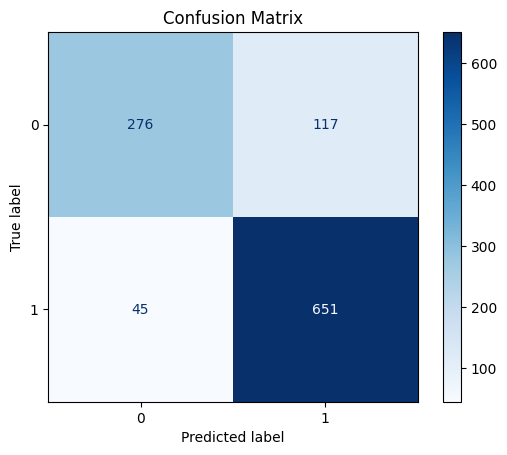

In [82]:
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_model_gb_tuned).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

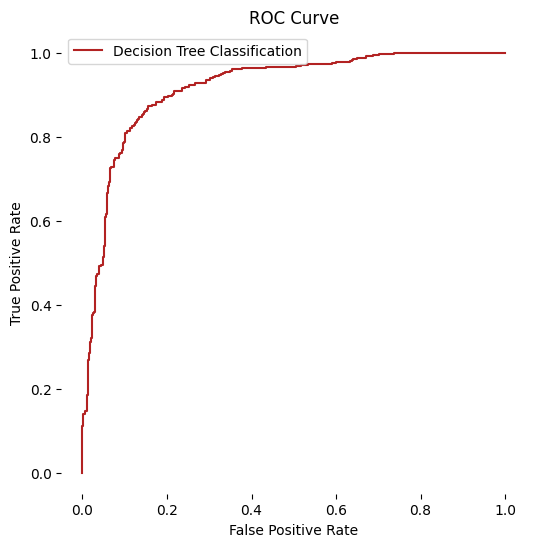

In [83]:
y_pred_probabiblity_gb_tuned = model_gb_tuned.predict_proba(X_test)[:,1]
fpr_tuned, tpr_tuned, thresholds_tuned = metrics.roc_curve(y_test,  y_pred_probabiblity_gb_tuned)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr_tuned, tpr_tuned, label='Decision Tree Classification', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend()

## 5. Result

In [ ]:
# Decision Tree, Knn, Random Forest very similar results -> Why are they similar -> Why did Random Forest from these 3 Models perform the best (is there
# a specific reason)
# Why did Naive Bayes perform the waeakest even after hyperparamter tuning?